# Spotify Data Crawler Source Code

Run the below code block.

It will display the block in which you can paste the URL to your playlist and type that's playlist genre

The URL is not the link in the search bar, you acquire it from share feature from spotify.



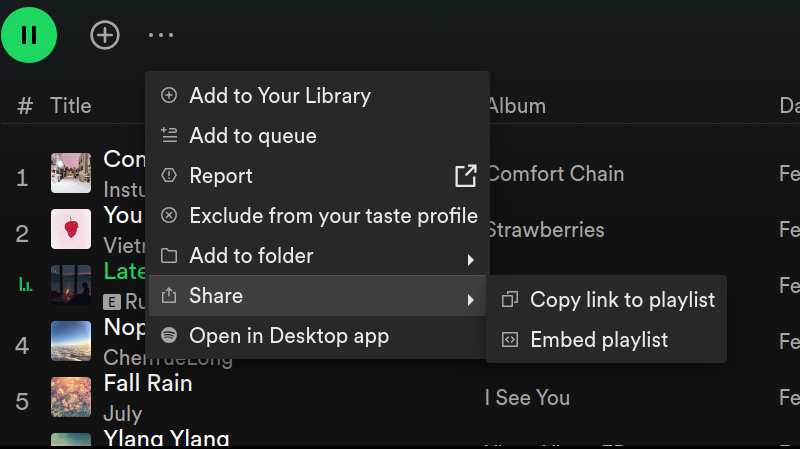


Then just paste the link into the block as well as fill in your genre label.

In [1]:
import numpy as np

PLAYLIST_LINK = input('Paste the playlist link here: \n') # <== CHANGE THIS

allow_range = ('blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock')
while True:
    GENRE = input("\n Enter your genre label (available label's values: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock): \n")
    if GENRE in allow_range:
        break
    else:
        print('Invalid label, please enter again.\n')

print(f'\n Received playlist for {GENRE}')

# These are default parameters, no need to update them.
CLIENT_ID = "d4e2644ec5d349b1acf21d02b89de09b"
CLIENT_SECRET = "73ffbb34e4af447bb1b1fef2a53ea7bf"

seed = 12
np.random.seed(seed)
HOP_LENGTH = 512
n_fft = 2048

In [65]:
libraries = ["requests", "mutagen", "ipywidgets","IPython", "spotipy"]

for library in libraries:
  try:
    __import__(library)
  except ImportError:
    !pip install {library}


from IPython.display import clear_output

clear_output()

import os
import string

import requests
import re
from mutagen.easyid3 import EasyID3
from mutagen.id3 import APIC, ID3

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import IPython
from IPython.display import display
from IPython.display import display, HTML, Javascript, Audio

import pandas as pd
import numpy as np
import os

import librosa
import librosa.display


if not os.path.exists('CSV'):
    os.makedirs('CSV')
# variables
CWD = os.getcwd()
LOCATION = os.path.join(CWD,'MUSIC')
if os.path.isdir(LOCATION)==False:
    os.mkdir(LOCATION)

def returnSPOT_ID(link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            return False
        return True

def handle_link_button_click(playlist_link):
    global SPOTIFY_PLAYLIST_LINK
    # Get the link from the input field
    if returnSPOT_ID(playlist_link):
        SPOTIFY_PLAYLIST_LINK = playlist_link
        # Display the entered link as a clickable HTML link
        display(HTML(f"Playlist Link Entered : <a href='{SPOTIFY_PLAYLIST_LINK}' target='_blank'>{SPOTIFY_PLAYLIST_LINK}</a>"))
        # Store the entered link as a global variable
        IPython.get_ipython().run_line_magic("store", "SPOTIFY_PLAYLIST_LINK")
    else:
        print('[*] Something Not Right about that link...  Try Again Please..')

class MusicScraper():

    def __init__(self):
        super(MusicScraper, self).__init__()
        self.counter = 0  # Initialize the counter to zero
        self.session = requests.Session()

    def get_ID(self, yt_id):
        # The 'get_ID' function from your scraper code
        LINK = f'https://api.spotifydown.com/getId/{yt_id}'
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/getId/{id}',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        response = self.session.get(url=LINK, headers=headers)
        if response.status_code == 200:
            data = response.json()
            return data['id']
        return None

    def generate_Analyze_id(self, yt_id):
        # The 'generate_Analyze_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/analyzeV2/ajax'
        data = {
            'k_query': f'https://www.youtube.com/watch?v={yt_id}',
            'k_page': 'home',
            'hl': 'en',
            'q_auto': 0,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def generate_Conversion_id(self, analyze_yt_id, analyze_id):
        # The 'generate_Conversion_id' function from your scraper code
        DL = 'https://corsproxy.io/?https://www.y2mate.com/mates/convertV2/index'
        data = {
            'vid'   : analyze_yt_id,
            'k'     : analyze_id,
        }
        headers = {
            'authority': 'corsproxy.io',
            'method': 'POST',
            'path': '/?https://www.y2mate.com/mates/analyzeV2/ajax',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
        }
        RES = self.session.post(url=DL, data=data, headers=headers)
        if RES.status_code == 200:
            return RES.json()
        return None

    def get_PlaylistMetadata(self, Playlist_ID):
        # The 'get_PlaylistMetadata' function from your scraper code
        URL = f"https://api.spotifydown.com/metadata/playlist/{Playlist_ID}"
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/metadata/playlist/{Playlist_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        meta_data = self.session.get(headers=headers, url=URL)
        if meta_data.status_code == 200:
            return meta_data.json()['title'] + ' - ' + meta_data.json()['artists']
        return None

    def errorcatch(self, SONG_ID):
        # The 'errorcatch' function from your scraper code
        print('[*] Trying to download...')
        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/download/{SONG_ID}',
            'scheme': 'https',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
        }
        x = self.session.get(headers=headers, url='https://api.spotifydown.com/download/' + SONG_ID)
        if x.status_code == 200:
            return x.json()['link']
        return None

    def V2catch(self, SONG_ID):
        ## Updated .. .19TH OCTOBER 2023
        # yt_id = self.get_ID(SONG_ID)

        # domain = ["co.wuk.sh", "cobalt2.snapredd.app"]
        # target_domain = domain[random.randint(0,len(domain) - 1)]
        headers = {
            "authority": "api.spotifydown.com",
            "method": "POST",
            "path": '/download/68GdZAAowWDac3SkdNWOwo',
            "scheme": "https",
            "Accept": "*/*",

            'Sec-Ch-Ua':'"Chromium";v="118", "Google Chrome";v="118", "Not=A?Brand";v="99"',
            "Dnt": '1',
            "Origin": "https://spotifydown.com",
            "Referer": "https://spotifydown.com/",
            "Sec-Ch-Ua-Mobile": "?0",
            "Sec-Fetch-Dest": "empty",
            "Sec-Fetch-Mode": "cors",
            "Sec-Fetch-Site": "cross-site",
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
        }

        ## Updated .. .29TH OCTOBER 2023
        x = self.session.get(url = f'https://api.spotifydown.com/download/{SONG_ID}', headers=headers)

        # if x.status_code == 200:

        #     # par = {
        #     #     'aFormat':'"mp3"',
        #     #     'dubLang':'false',
        #     #     'filenamePattern':'"classic"',
        #     #     'isAudioOnly':'true',
        #     #     'isNoTTWatermark':'true',
        #     #     'url':f'"https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D{yt_id}"'
        #     # }

        #     file_status = self.session.post(url=f"https://{target_domain}/api/json", json=par, headers=headers)
        # print('[*] Data Gathered : ', str(x.content))
        if x.status_code == 200:

            try:
                return {
                    'link' : x.json()['link'],
                    'metadata' : None
                }
            except:
                return {
                    'link' : None,
                    'metadata' : None
                }

        return None


    def scrape_playlist(self, spotify_playlist_link, music_folder):
        ID = self.returnSPOT_ID(spotify_playlist_link)
        PlaylistName = self.get_PlaylistMetadata(ID)
        print('Playlist Name : ', PlaylistName)
        # Create Folder for Playlist
        if not os.path.exists(music_folder):
            os.makedirs(music_folder)
        try:
            FolderPath = ''.join(e for e in PlaylistName)
            playlist_folder_path = os.path.join(music_folder, FolderPath)
        except:
            playlist_folder_path = music_folder

        if not os.path.exists(playlist_folder_path):
            os.makedirs(playlist_folder_path)

        headers = {
            'authority': 'api.spotifydown.com',
            'method': 'GET',
            'path': f'/trackList/playlist/{ID}',
            'scheme': 'https',
            'accept': '*/*',
            'dnt': '1',
            'origin': 'https://spotifydown.com',
            'referer': 'https://spotifydown.com/',
            'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
            'sec-ch-ua-mobile': '?0',
            'sec-ch-ua-platform': '"Windows"',
            'sec-fetch-dest': 'empty',
            'sec-fetch-mode': 'cors',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
        }

        Playlist_Link = f'https://api.spotifydown.com/trackList/playlist/{ID}'
        offset_data = {}
        offset = 0
        offset_data['offset'] = offset

        while offset is not None:
            response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            if response.status_code == 200:
                Tdata = response.json()['trackList']
                page = response.json()['nextOffset']
                print("*"*100)
                c = 0
                for count, song in enumerate(Tdata):
                    c += 1
                    print(f"[{c}] Downloading : ", song['title'], "-", song['artists'])
                    filename = song['title'].translate(str.maketrans('', '', string.punctuation)) + ' - ' + song['artists'].translate(str.maketrans('', '', string.punctuation)) + '.mp3'
                    filepath = os.path.join(playlist_folder_path, filename)
                    try:
                        try:
                            V2METHOD    = self.V2catch(song['id'])
                            DL_LINK     = V2METHOD['link']
                            SONG_META   = song
                            SONG_META['file'] = filepath

                        except IndentationError:
                            yt_id = self.get_ID(song['id'])

                            if yt_id is not None:
                                data = self.generate_Analyze_id(yt_id['id'])
                                try:
                                    DL_ID = data['links']['mp3']['mp3128']['k']
                                    DL_DATA = self.generate_Conversion_id(data['vid'], DL_ID)
                                    DL_LINK = DL_DATA['dlink']
                                except Exception as NoLinkError:
                                    CatchMe = self.errorcatch(song['id'])
                                    if CatchMe is not None:
                                        DL_LINK = CatchMe
                            else:
                                print('[*] No data found for : ', song)
                        except TypeError:
                          continue

                        download_complete = False
                        try:
                          if DL_LINK is not None:
                              ## DOWNLOAD
                              link = self.session.get(DL_LINK, stream=True)
                              total_size = int(link.headers.get('content-length', 0))
                              block_size = 1024  # 1 Kilobyte
                              downloaded = 0
                              ## Save
                              with open(filepath, "wb") as f:
                                  for data in link.iter_content(block_size):
                                      f.write(data)
                                      downloaded += len(data)
                              download_complete = True
                              #Increment the counter
                              self.increment_counter()
                          else:
                              print('[*] No Download Link Found. Skipping...')
                          if (DL_LINK is not None)&(download_complete == True):
                              songTag = WritingMetaTags(tags=SONG_META, filename=filepath)
                              song_meta_add = songTag.WritingMetaTags()
                        except ConnectionError:
                            continue
                    except IndentationError as error_status:
                        print('[*] Error Status Code : ', error_status)

            if page is not None:
                offset_data['offset'] = page
                response = self.session.get(url=Playlist_Link, params=offset_data, headers=headers)
            else:
                print("*"*100)
                print('[*] Download Complete!')
                print("*"*100)
                break
        return playlist_folder_path


    def returnSPOT_ID(self, link):
        # # The 'returnSPOT_ID' function from your scraper code

        # Define the regular expression pattern for the Spotify playlist URL
        pattern = r"https://open\.spotify\.com/playlist/([a-zA-Z0-9]+)\?si=.*"

        # Try to match the pattern in the input text
        match = re.match(pattern, link)

        if not match:
            raise ValueError("Invalid Spotify playlist URL.")
        # Extract the playlist ID from the matched pattern
        extracted_id = match.group(1)

        return extracted_id

    def increment_counter(self):
            self.counter += 1

# Scraper Thread
class WritingMetaTags():
    def __init__(self, tags, filename):
        super().__init__()
        self.tags = tags
        self.filename = filename
        self.PICTUREDATA = None
        self.url = None

    def setPIC(self):
        if self.tags['cover'] is None:
            pass
        else:
            try:
                response = requests.get(self.tags['cover']+"?size=1", stream=True)
                if response.status_code == 200 :
                    audio = ID3(self.filename)
                    audio['APIC'] = APIC(
                        encoding=3,
                        mime='image/jpeg',
                        type=3,
                        desc=u'Cover',
                        data=response.content
                    )
                    audio.save()

            except Exception as e:
                print(f"Error adding cover: {e}")

    def WritingMetaTags(self):
        try:
            # print('[*] FileName : ', self.filename)
            audio = EasyID3(self.filename)
            audio['title'] = self.tags['title']
            audio['artist'] = self.tags['artists']
            audio['album'] = self.tags['album']
            audio['date'] = self.tags['releaseDate']
            audio.save()
            self.setPIC()

        except Exception as e:
            print(f'Error {e}')

# Function to extract features from audio file
def extract_features(y, sr):
    # Extract features
    chroma_stft_mean = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=HOP_LENGTH).mean()
    chroma_stft_var = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=HOP_LENGTH).var()
    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()
    spectral_bandwidth_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwidth_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y, hop_length=HOP_LENGTH).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y, hop_length=HOP_LENGTH).var()
    harmony, perceptr = librosa.effects.hpss(y)
    harmony_mean = harmony.mean()
    harmony_var = harmony.var()
    perceptr_mean = perceptr.mean()
    perceptr_var = perceptr.var()

    tempo = librosa.beat.beat_track(y=y, sr=sr, units='time')[0]
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_means = mfccs.mean(axis=1)
    mfcc_vars = mfccs.var(axis=1)

    # Create DataFrame
    features = pd.DataFrame({
        'chroma_stft_mean': [chroma_stft_mean],
        'chroma_stft_var': [chroma_stft_var],
        'rms_mean': [rms_mean],
        'rms_var': [rms_var],
        'spectral_centroid_mean': [spectral_centroid_mean],
        'spectral_centroid_var': [spectral_centroid_var],
        'spectral_bandwidth_mean': [spectral_bandwidth_mean],
        'spectral_bandwidth_var': [spectral_bandwidth_var],
        'rolloff_mean': [rolloff_mean],
        'rolloff_var': [rolloff_var],
        'zero_crossing_rate_mean': [zero_crossing_rate_mean],
        'zero_crossing_rate_var': [zero_crossing_rate_var],
        'harmony_mean': [harmony_mean.mean()],
        'harmony_var': [harmony_var.var()],
        'perceptr_mean': [perceptr_mean.mean()],
        'perceptr_var': [perceptr_var.var()],
        'tempo' :[tempo]
    })

    # Add MFCC features
    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = [mfcc_means[i-1]]
        features[f'mfcc{i}_var'] = [mfcc_vars[i-1]]
    return features

def analyze_audio(audio_file):
    y, sr = librosa.load(audio_file)
    l = len(y)//2
    features_comb = []
    start = 0
    while start + 30*sr < len(y):
        features_comb.append((extract_features(y[start:start+30*sr],sr),start))
        start = start + 30*sr
    return features_comb

def playlist_to_features_csv(directory,genre):
    # Initialize an empty DataFrame
    df = pd.DataFrame()
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.mp3'):
            filepath = os.path.join(directory, filename)
            for data, start in analyze_audio(filepath):
                df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
    df['label'] = genre
    # Save the csv file to Music Crawler/CSV/
    df.to_csv('/content/CSV/crawled_'+genre+'_dataframe.csv')
    return df

def get_playlist_name(playlist_link, client_id, client_secret):
    # Extract playlist ID from the link
    playlist_id = playlist_link.split('/')[-1].split('?')[0]

    # Initialize Spotipy client with the provided client ID
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Fetch playlist information
    playlist_info = sp.playlist(playlist_id)

    # Extract and return the playlist name
    playlist_name = playlist_info['name']
    playlist_author = playlist_info['owner']['display_name']
    return playlist_name + ' - ' + playlist_author




'*********************************************'
handle_link_button_click(PLAYLIST_LINK)

if SPOTIFY_PLAYLIST_LINK is not None:
    OFFSET_VARIABLE = 0 #<-- Change to start from x number of songs
    music_folder = os.path.join(os.getcwd(), "MUSIC/"+GENRE)  # Change this path to your desired music folder (may be genres)

    scraper = MusicScraper()
    ID = scraper.returnSPOT_ID(SPOTIFY_PLAYLIST_LINK)
    PLAYLIST_PATH = scraper.scrape_playlist(SPOTIFY_PLAYLIST_LINK, music_folder)
else:
    print("[*] ERROR OCCURRED. MISSING PLAYLIST LINK !")

clear_output()
print('Extracting Fetures...')
directory = "/content/MUSIC/"+GENRE+"/"+ get_playlist_name(PLAYLIST_LINK, CLIENT_ID, CLIENT_SECRET) # <== paste the playlist path to here
df = playlist_to_features_csv(directory,GENRE)
clear_output()
print('\n')
print(f'*****************************Your data for {GENRE}********************************')
display(df)
print('*******************************Everything done !!*********************************')



*****************************Your data for pop********************************


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.255590,0.095383,0.114942,0.002603,1319.553487,676359.390407,1702.960040,688376.448253,2854.049409,4.479468e+06,...,70.705383,-5.317116,127.030678,-0.537474,129.340317,-2.477745,142.668304,-2.475744,141.063507,pop
1,0.281317,0.095184,0.140306,0.003700,2005.049094,930312.989689,2556.533436,482635.686497,4751.496268,5.917513e+06,...,96.181862,-6.119009,136.072968,-2.006256,107.335960,-4.818178,123.006821,-2.344247,118.314613,pop
2,0.273734,0.092932,0.184498,0.003559,1753.836930,732314.004682,2332.679149,483035.272206,3906.068047,4.884392e+06,...,129.546906,2.987831,127.344116,6.639476,107.371201,-1.997988,121.552338,2.820207,102.353218,pop
3,0.331148,0.088130,0.192509,0.003446,1329.465780,657403.923609,2078.229277,499360.056630,2765.441611,4.389363e+06,...,79.629875,-1.451621,91.548668,1.626129,72.534294,-4.674729,65.154984,-0.709309,74.132698,pop
4,0.304720,0.089662,0.207177,0.003679,1837.171806,562088.975512,2548.423805,299865.306310,4392.656772,4.368656e+06,...,121.132591,1.544724,138.528534,3.302430,96.257744,-3.063846,102.268227,0.834143,105.663857,pop
5,0.327761,0.091710,0.189860,0.006373,1824.511196,784074.418661,2504.717542,293742.309051,4182.558042,4.745631e+06,...,80.042786,-0.979569,60.736130,1.482629,73.575226,-4.188705,76.510094,1.590496,61.654926,pop
6,0.308781,0.091405,0.208600,0.007144,2124.213353,560875.791437,2689.308356,143396.044463,5068.752683,3.047243e+06,...,89.892792,1.202800,121.386391,1.977667,77.106827,-1.153804,69.980324,4.296715,96.688629,pop
7,0.318730,0.085918,0.222816,0.003404,1888.050383,581465.408991,2559.675806,218077.872527,4374.423548,3.904580e+06,...,97.940453,1.255328,77.245949,2.822697,73.330627,-0.408872,83.806999,3.149523,83.455414,pop
8,0.332637,0.105234,0.058483,0.002795,1287.127687,419004.691933,1559.363767,725408.877272,2619.692492,2.742404e+06,...,96.873383,-7.159343,131.987411,-6.139868,66.859047,-5.800425,66.442818,-6.303331,63.685059,pop
9,0.292803,0.086720,0.171662,0.002578,1447.573062,403702.047744,2043.619253,216503.909906,2852.291086,2.345442e+06,...,88.260475,0.465373,94.406265,-4.520276,59.804157,-8.616072,48.161434,3.239311,39.390427,pop


*******************************Everything done !!*********************************


After the tabular showing up, click the left hand side folder button on your colab screen, navigate the csv file crawled_{your_genre}_dataframe.csv, download it to your local computer and push the csv file onto github for better collaboration.